# use trained model to another dataset

# 1.remove doggy image

In [1]:
import tensorflow as tf
import os

In [2]:
import cv2
import imghdr

In [3]:
data_dir2 = 'Indian-Snakes-Dataset' 

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir2): 
    print(image_class)

Venomous
.DS_Store
Non-Venomous


In [10]:
for image_class in os.listdir(data_dir2):
    if image_class == '.DS_Store':
        file_path = os.path.join(data_dir2, image_class)
        os.remove(file_path)
    else:
        print(image_class)

Venomous
Non-Venomous


In [11]:
for image_class in os.listdir(data_dir2): 
    for image in os.listdir(os.path.join(data_dir2, image_class)):
        image_path = os.path.join(data_dir2, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image Indian-Snakes-Dataset/Venomous/King Cobra
Issue with image Indian-Snakes-Dataset/Venomous/Common Krait
Issue with image Indian-Snakes-Dataset/Venomous/Monocled Cobra
Issue with image Indian-Snakes-Dataset/Venomous/Spectacled Cobra
Issue with image Indian-Snakes-Dataset/Venomous/Saw-scaled Viper
Issue with image Indian-Snakes-Dataset/Venomous/Russell's Viper
Issue with image Indian-Snakes-Dataset/Non-Venomous/Green Tree Vine
Issue with image Indian-Snakes-Dataset/Non-Venomous/Common Sand Boa
Issue with image Indian-Snakes-Dataset/Non-Venomous/Common Rat Snake
Issue with image Indian-Snakes-Dataset/Non-Venomous/Banded Racer
Issue with image Indian-Snakes-Dataset/Non-Venomous/Common Trinket
Issue with image Indian-Snakes-Dataset/Non-Venomous/Checkered Keelback
Issue with image Indian-Snakes-Dataset/Non-Venomous/Indian Rock Python


In [12]:
import os

class_mapping = {}  # Dictionary to store the mapping between class names and labels

for label, image_class in enumerate(os.listdir(data_dir2)):
    if image_class == '.DS_Store':
        file_path = os.path.join(data_dir2, image_class)
        os.remove(file_path)
    else:
        class_name = image_class.split('_')[0]
        print(f"{class_name}: {label}")
        class_mapping[label] = class_name

Venomous: 0
Non-Venomous: 1


In [13]:
print(class_mapping)

{0: 'Venomous', 1: 'Non-Venomous'}


# 2.load data

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
data= tf.keras.utils.image_dataset_from_directory('Indian-Snakes-Dataset')

Found 1780 files belonging to 2 classes.


In [17]:
data_iterator = data.as_numpy_iterator()

2023-07-18 16:34:50.633983: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1780]
	 [[{{node Placeholder/_0}}]]
2023-07-18 16:34:50.634358: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1780]
	 [[{{node Placeholder/_0}}]]


In [18]:
batch = data_iterator.next()

Corrupt JPEG data: 65536 extraneous bytes before marker 0xda


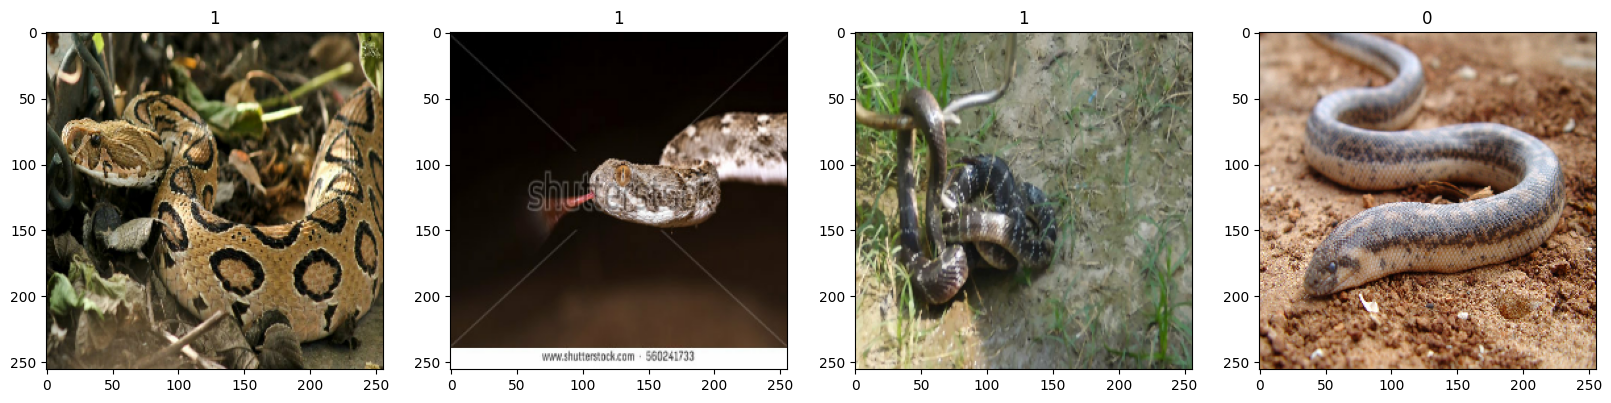

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 3.scale data

In [20]:
data = data.map(lambda x,y: (x/255, y))

In [21]:
data.as_numpy_iterator().next()

2023-07-18 16:35:16.948717: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1780]
	 [[{{node Placeholder/_4}}]]
2023-07-18 16:35:16.949132: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1780]
	 [[{{node Placeholder/_4}}]]
Corrupt JPEG data: 65536 extraneous bytes before marker 0xda


(array([[[[6.09918833e-01, 5.66781580e-01, 5.51095307e-01],
          [6.21683538e-01, 5.78546286e-01, 5.66781580e-01],
          [6.31602347e-01, 5.84543526e-01, 5.84543526e-01],
          ...,
          [1.80851713e-01, 1.70703128e-01, 5.51317409e-02],
          [2.03691795e-01, 1.70703128e-01, 6.27451017e-02],
          [2.07843140e-01, 1.64935663e-01, 6.87423423e-02]],
 
         [[6.24218762e-01, 5.81081510e-01, 5.67700684e-01],
          [6.37944221e-01, 5.92846215e-01, 5.88924646e-01],
          [6.49708927e-01, 6.02650106e-01, 6.10493243e-01],
          ...,
          [2.14296103e-01, 1.93190873e-01, 8.06181058e-02],
          [2.13951439e-01, 1.86500460e-01, 7.66965374e-02],
          [2.26524204e-01, 1.87308520e-01, 8.92693028e-02]],
 
         [[6.35294139e-01, 5.92156887e-01, 5.82927406e-01],
          [6.46365643e-01, 6.01267636e-01, 5.97346067e-01],
          [6.56862736e-01, 6.09803915e-01, 6.17647052e-01],
          ...,
          [2.58923113e-01, 2.19251692e-01, 1.1394

# 4.split data

In [22]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = len(data) - train_size - val_size

In [23]:
len(data)

56

In [24]:
train_size

39

In [25]:
val_size

11

In [26]:
test_size

6

In [27]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 5.use model

In [28]:
from keras.models import load_model

In [29]:
new_model = load_model('models/imageclassifier.h5')

In [30]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = new_model.predict(X) 
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2023-07-18 16:35:48.180510: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1780]
	 [[{{node Placeholder/_4}}]]
2023-07-18 16:35:48.180922: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1780]
	 [[{{node Placeholder/_0}}]]
Corrupt JPEG data: 65536 extraneous bytes before marker 0xda


1/1 [==============================] - 2s 2s/step


In [33]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.7126437, shape=(), dtype=float32) tf.Tensor(0.5344828, shape=(), dtype=float32) tf.Tensor(0.5611111, shape=(), dtype=float32)


# bonus: pass single image that our model has never seen before  to verify

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
new_image='' #pass image that our model has never seen before

In [ ]:

img = cv2.imread(new_image)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is NonPoison')
else:
    print(f'Predicted class is Poison')